In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

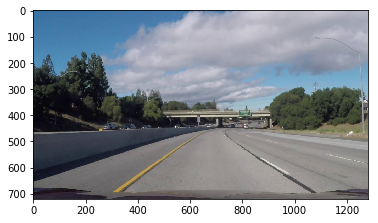

In [2]:
img = cv2.cvtColor(cv2.imread('image1.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Random Brightness

In [3]:
def change_light(image, coeff):
    image = np.copy(image)
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS = np.array(image_HLS, dtype = np.float64)
    image_HLS[:, :, 1] = image_HLS[:, :, 1] * coeff
    if coeff > 1:
        image_HLS[:, :, 1][image_HLS[:, :, 1] > 255] = 255
    else:
        image_HLS[:, :, 1][image_HLS[:, :, 1] < 0] = 0
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)
    return image_RGB

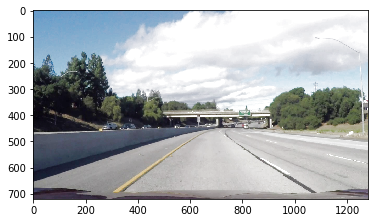

In [4]:
bright_img = change_light(img, 1 + np.random.uniform(0,1))
plt.imshow(bright_img)
plt.show()

## Random dark

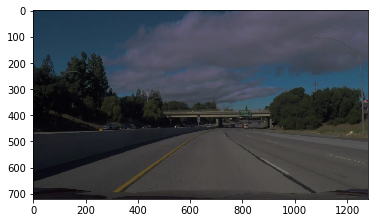

In [5]:
dark_img = change_light(img, 0.5)
plt.imshow(dark_img)
plt.show()

## Random shadow

In [6]:
import random

def generate_shadow_coordinates(
    imshape, no_of_shadows, rectangular_roi, shadow_dimension
):
    vertices_list = []
    x1 = rectangular_roi[0]
    y1 = rectangular_roi[1]
    x2 = rectangular_roi[2]
    y2 = rectangular_roi[3]
    for index in range(no_of_shadows):
        vertex = []
        for dimensions in range(
            shadow_dimension
        ):
            vertex.append((random.randint(x1, x2), random.randint(y1, y2)))
        vertices = np.array(
            [vertex], dtype = np.int32
        ) 
        vertices_list.append(vertices)
    return vertices_list

def shadow_process(image, no_of_shadows, x1, y1, x2, y2, shadow_dimension):
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)  ## Conversion to HLS
    mask = np.zeros_like(image)
    imshape = image.shape
    vertices_list = generate_shadow_coordinates(
        imshape, no_of_shadows, (x1, y1, x2, y2), shadow_dimension
    )
    for vertices in vertices_list:
        cv2.fillPoly(
            mask, vertices, 255
        )
    image_HLS[:, :, 1][mask[:, :, 0] == 255] = (
        image_HLS[:, :, 1][mask[:, :, 0] == 255] * 0.5
    )
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)  ## Conversion to RGB
    return image_RGB

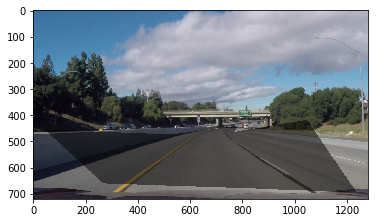

In [7]:
shadow_img = shadow_process(img,np.random.randint(1,5),
                            0,
                            img.shape[0]//2,
                            img.shape[1],
                            img.shape[0], 5)
plt.imshow(shadow_img)
plt.show()

## Random snow

In [8]:
def snow_process(image, snow_coeff):
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS = np.array(image_HLS, dtype = np.float64)
    brightness_coefficient = 2.5
    imshape = image.shape
    snow_point = snow_coeff
    image_HLS[:, :, 1][image_HLS[:, :, 1] < snow_point] = (
        image_HLS[:, :, 1][image_HLS[:, :, 1] < snow_point]
        * brightness_coefficient
    )
    image_HLS[:, :, 1][
        image_HLS[:, :, 1] > 255
    ] = 255
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)  ## Conversion to RGB
    return image_RGB

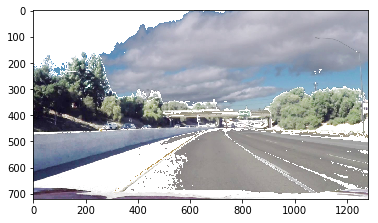

In [9]:
good_snow = 0.4 * (255 / 2) + (255 / 3)
snow_img = snow_process(img, good_snow)
plt.imshow(snow_img)
plt.show()

## Random rain

In [10]:
def generate_random_lines(imshape, slant, drop_length, rain_type):
    drops = []
    area = imshape[0] * imshape[1]
    no_of_drops = area // 600

    if rain_type.lower() == 'drizzle':
        no_of_drops = area // 770
        drop_length = 10
    elif rain_type.lower() == 'heavy':
        drop_length = 30
    elif rain_type.lower() == 'torrential':
        no_of_drops = area // 500
        drop_length = 60
    for i in range(no_of_drops):
        if slant < 0:
            x = np.random.randint(slant, imshape[1])
        else:
            x = np.random.randint(0, imshape[1] - slant)
        y = np.random.randint(0, imshape[0] - drop_length)
        drops.append((x, y))
    return drops, drop_length


def rain_process(image, slant, drop_length, drop_color, drop_width, rain_drops):
    imshape = image.shape
    image_t = image.copy()
    for rain_drop in rain_drops:
        cv2.line(
            image_t,
            (rain_drop[0], rain_drop[1]),
            (rain_drop[0] + slant, rain_drop[1] + drop_length),
            drop_color,
            drop_width,
        )
    image = cv2.blur(image_t, (7, 7))
    brightness_coefficient = 0.7
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS[:, :, 1] = image_HLS[:, :, 1] * brightness_coefficient
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)
    return image_RGB

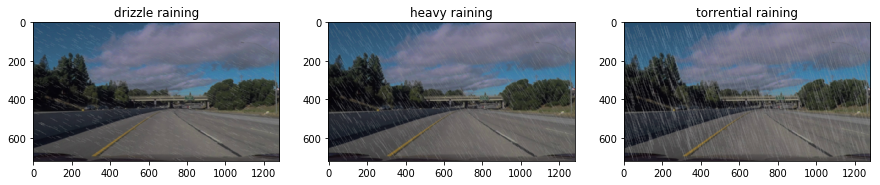

In [11]:
plt.figure(figsize=(15,5))
slant = 20
drop_length = 20
plt.subplot(1,3,1)
rain_drops,drop_length = generate_random_lines(img.shape, slant, drop_length, 'drizzle')
heavy_rain_img = rain_process(img, 20, drop_length, (200,200,200), 1, rain_drops)
plt.imshow(heavy_rain_img)
plt.title('drizzle raining')
plt.subplot(1,3,2)
rain_drops,drop_length = generate_random_lines(img.shape, slant, drop_length, 'heavy')
heavy_rain_img = rain_process(img, 20, drop_length, (200,200,200), 1, rain_drops)
plt.imshow(heavy_rain_img)
plt.title('heavy raining')
plt.subplot(1,3,3)
rain_drops,drop_length = generate_random_lines(img.shape, slant, drop_length, 'torrential')
heavy_rain_img = rain_process(img, 20, drop_length, (200,200,200), 1, rain_drops)
plt.imshow(heavy_rain_img)
plt.title('torrential raining')
plt.show()

## Random fog

In [12]:
def add_blur(image, x, y, hw, fog_coeff):
    overlay = image.copy()
    output = image.copy()
    alpha = 0.08 * fog_coeff
    rad = hw // 2
    point = (x + hw // 2, y + hw // 2)
    cv2.circle(overlay, point, int(rad), (255, 255, 255), -1)
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    return output


def generate_random_blur_coordinates(imshape, hw):
    blur_points = []
    midx = imshape[1] // 2 - 2 * hw
    midy = imshape[0] // 2 - hw
    index = 1
    while midx > -hw or midy > -hw:
        for i in range(hw // 10 * index):
            x = np.random.randint(midx, imshape[1] - midx - hw)
            y = np.random.randint(midy, imshape[0] - midy - hw)
            blur_points.append((x, y))
        midx -= 3 * hw * imshape[1] // sum(imshape)
        midy -= 3 * hw * imshape[0] // sum(imshape)
        index += 1
    return blur_points

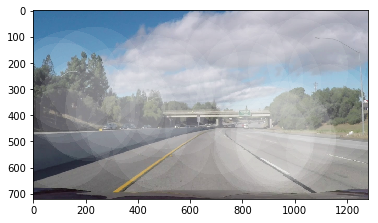

In [18]:
haze_img = img.copy()
hw = int(haze_img.shape[1] // 3 * 0.9)
haze_list = generate_random_blur_coordinates(img.shape, hw)
for haze_points in haze_list:
    haze_img = add_blur(haze_img, haze_points[0],haze_points[1], hw, 0.9) 

plt.imshow(haze_img)
plt.show()

In [14]:
def flare_source(image, point, radius, src_color):
    overlay = image.copy()
    output = image.copy()
    num_times = radius // 10
    alpha = np.linspace(0.0, 1, num = num_times)
    rad = np.linspace(1, radius, num = num_times)
    for i in range(num_times):
        cv2.circle(overlay, point, int(rad[i]), src_color, -1)
        alp = (
            alpha[num_times - i - 1]
            * alpha[num_times - i - 1]
            * alpha[num_times - i - 1]
        )
        cv2.addWeighted(overlay, alp, output, 1 - alp, 0, output)
    return output


def add_sun_flare_line(flare_center, angle, imshape):
    x = []
    y = []
    i = 0
    for rand_x in range(0, imshape[1], 10):
        rand_y = np.tan(angle) * (rand_x - flare_center[0]) + flare_center[1]
        x.append(rand_x)
        y.append(2 * flare_center[1] - rand_y)
    return x, y


def add_sun_process(
    image, no_of_flare_circles, flare_center, src_radius, x, y, src_color
):
    overlay = image.copy()
    output = image.copy()
    imshape = image.shape
    for i in range(no_of_flare_circles):
        alpha = random.uniform(0.05, 0.2)
        r = random.randint(0, len(x) - 1)
        rad = random.randint(1, imshape[0] // 100 - 2)
        cv2.circle(
            overlay,
            (int(x[r]), int(y[r])),
            rad * rad * rad,
            (
                random.randint(max(src_color[0] - 50, 0), src_color[0]),
                random.randint(max(src_color[1] - 50, 0), src_color[1]),
                random.randint(max(src_color[2] - 50, 0), src_color[2]),
            ),
            -1,
        )
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    output = flare_source(
        output,
        (int(flare_center[0]), int(flare_center[1])),
        src_radius,
        src_color,
    )
    return output

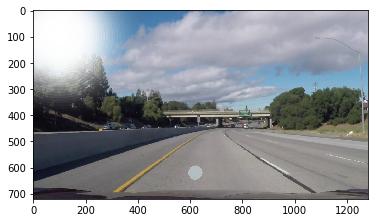

In [15]:
x, y = add_sun_flare_line((100,100), -np.pi/4, img.shape)
sun_img = add_sun_process(img, 8, (100,100), 400, x, y,(255,255,255))
plt.imshow(sun_img)
plt.show()

## Add speed

In [16]:
def apply_motion_blur(image, count):
    image_t = image.copy()
    imshape = image_t.shape
    size = 15
    kernel_motion_blur = np.zeros((size, size))
    kernel_motion_blur[int((size - 1) / 2), :] = np.ones(size)
    kernel_motion_blur = kernel_motion_blur / size
    i = int(imshape[1] * 3 // 4 - 10 * count)
    while i <= imshape[1]:
        image_t[:, i:, :] = cv2.filter2D(
            image_t[:, i:, :], -1, kernel_motion_blur
        )
        image_t[:, : imshape[1] - i, :] = cv2.filter2D(
            image_t[:, : imshape[1] - i, :], -1, kernel_motion_blur
        )
        i += int(imshape[1] // 25 - count)
        count += 1
    image_RGB = image_t
    return image_RGB

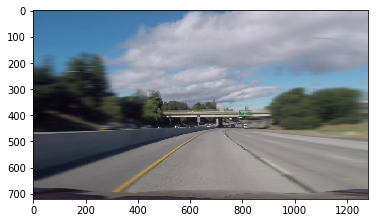

In [17]:
speed_img = apply_motion_blur(img, 15)
plt.imshow(speed_img)
plt.show()

## Add autumn

In [19]:
def autumn_process(image):
    image_t = image.copy()
    imshape = image_t.shape
    image_hls = cv2.cvtColor(image_t, cv2.COLOR_RGB2HLS)
    step = 8
    aut_colors = [1, 5, 9, 11]
    col = aut_colors[random.randint(0, 3)]
    for i in range(0, imshape[1], step):
        for j in range(0, imshape[0], step):
            avg = np.average(image_hls[j : j + step, i : i + step, 0])
            if (
                avg > 20
                and avg < 100
                and np.average(image[j : j + step, i : i + step, 1]) < 100
            ):
                image_hls[j : j + step, i : i + step, 0] = col
                image_hls[j : j + step, i : i + step, 2] = 255
    return cv2.cvtColor(image_hls, cv2.COLOR_HLS2RGB)

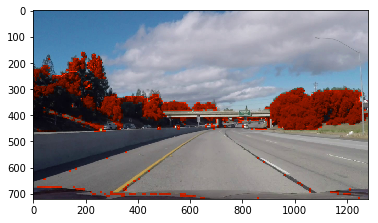

In [21]:
autumn_img = autumn_process(img)
plt.imshow(autumn_img)
plt.show()

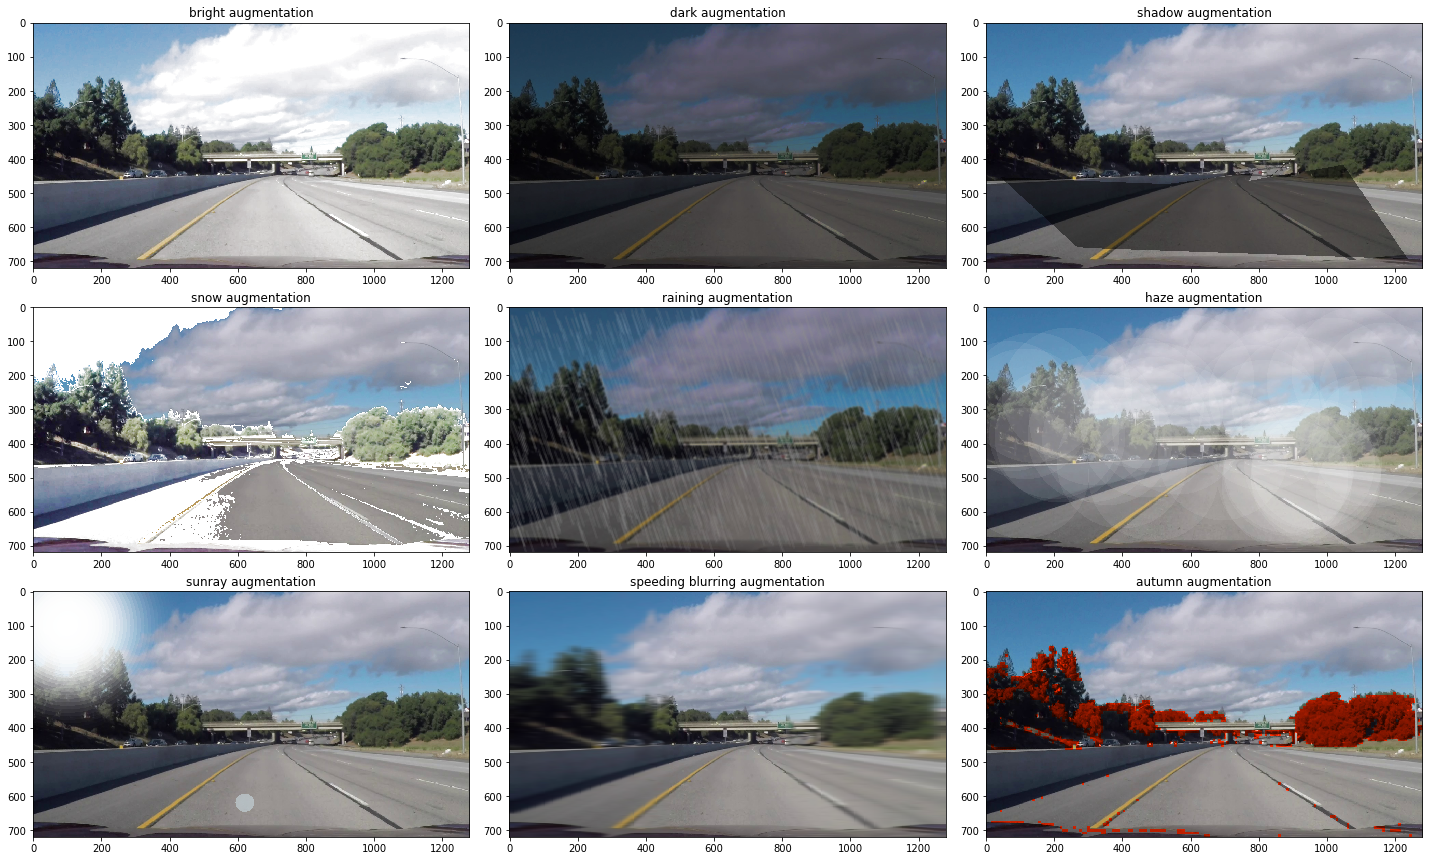

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
plt.imshow(bright_img)
plt.title('bright augmentation')
plt.subplot(3, 3, 2)
plt.imshow(dark_img)
plt.title('dark augmentation')
plt.subplot(3, 3, 3)
plt.imshow(shadow_img)
plt.title('shadow augmentation')
plt.subplot(3, 3, 4)
plt.imshow(snow_img)
plt.title('snow augmentation')
plt.subplot(3, 3, 5)
plt.imshow(heavy_rain_img)
plt.title('raining augmentation')
plt.subplot(3, 3, 6)
plt.imshow(haze_img)
plt.title('haze augmentation')
plt.subplot(3, 3, 7)
plt.imshow(sun_img)
plt.title('sunray augmentation')
plt.subplot(3, 3, 8)
plt.imshow(speed_img)
plt.title('speeding blurring augmentation')
plt.subplot(3, 3, 9)
plt.imshow(autumn_img)
plt.title('autumn augmentation')
plt.tight_layout()
plt.show()